# LFADS length generalisation on Lorenz Supp. Fig. A5 A6

In [1]:
%load_ext autoreload
%autoreload 2


# append parent directory to path (../notebooks -> ..)
import os
import sys
sys.path.append(os.path.dirname(os.getcwd()))
os.chdir(os.path.dirname(os.getcwd()))

# imports
import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc_file('matplotlibrc')

# approximate importance of each latent dim
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from ldns.utils.plotting_utils import cm2inch

# load data
import pickle

## 16 times length generalization

In [2]:

# load data sampled from LFADS
baseline_path ='exp/stored_spike_samples/'
with open(baseline_path+"lorenz_samples.pkl", "rb") as f:
    data_dict = pickle.load(f)

spikes = data_dict["sampled_spikes"]
rates = data_dict["sampled_rates"]
latents = data_dict["sampled_latents"]
lorenz_states = data_dict["sampled_lorenz"]

latent_input = latents.reshape(-1, 40)
latent_input = StandardScaler().fit_transform(latent_input)
lorenz_output = lorenz_states.reshape(-1, 3)
lr = LinearRegression()
lr.fit(latent_input, lorenz_output)
lr.score(latent_input, lorenz_output)
weights = np.linalg.norm(lr.coef_, axis=0)

# plot
rng = np.random.default_rng(0)  # set seed
tr = 1  # trial number (out of 8)
n_views = 4  # number of subsets of 3 latent dims to plot

def clear_ticks(ax, three_d=False):  # convenience func
    ax.set_xticks([])
    ax.set_yticks([])
    if three_d:
        ax.set_zticks([])



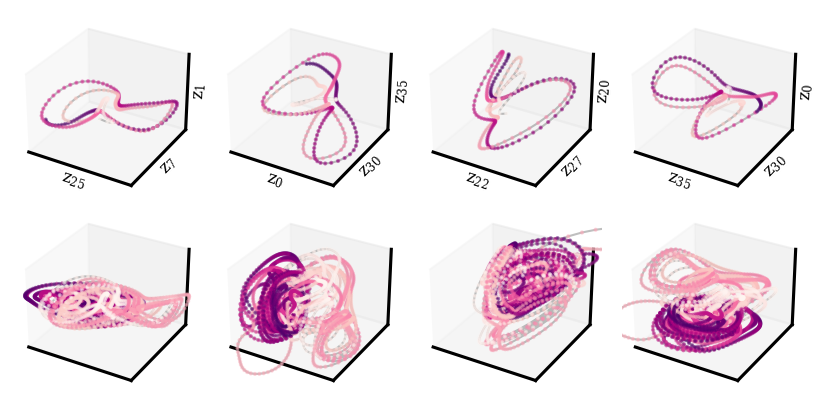

In [3]:
fig = plt.figure(figsize=cm2inch(n_views * 3.5, 7))

# loop over views
for i in range(n_views):
    d1, d2, d3 = rng.choice(40, size=3, p=weights / weights.sum(), replace=False)  # randomly subselect latent dims
    ax1 = fig.add_subplot(201 + n_views * 10 + i, projection="3d")
    ax2 = fig.add_subplot(201 + n_views * 10 + i + n_views, projection="3d")

    # plot within training length
    ax1.plot(latents[tr,:256,d1], latents[tr,:256,d2], latents[tr,:256,d3], color="gray", alpha=0.5)
    ax1.scatter(
        latents[tr,:256,d1], latents[tr,:256,d2], latents[tr,:256,d3], 
        color=plt.get_cmap("RdPu")(np.linspace(0, 1, 256)), alpha=0.5, s=1,
    )

    # plot length generalization
    ax2.plot(latents[tr,:,d1], latents[tr,:,d2], latents[tr,:,d3], color="gray", alpha=0.5)
    ax2.scatter(
        latents[tr,:,d1], latents[tr,:,d2], latents[tr,:,d3], 
        color=plt.get_cmap("RdPu")(np.linspace(0, 1, latents.shape[1])), alpha=0.5, s=1,
    )

    # clip limits to nicer region
    ax2.set_xlim(*ax1.get_xlim())
    ax2.set_ylim(*ax1.get_ylim())
    ax2.set_zlim(*ax1.get_zlim())

    # clear axis ticks
    clear_ticks(ax1, three_d=True)
    clear_ticks(ax2, three_d=True)

    # label dimensions
    ax1.set_xlabel(f"$z_{{{d1}}}$", labelpad=-17.0)
    ax1.set_ylabel(f"$z_{{{d2}}}$", labelpad=-17.0)
    ax1.set_zlabel(f"$z_{{{d3}}}$", labelpad=-17.3)

plt.tight_layout()


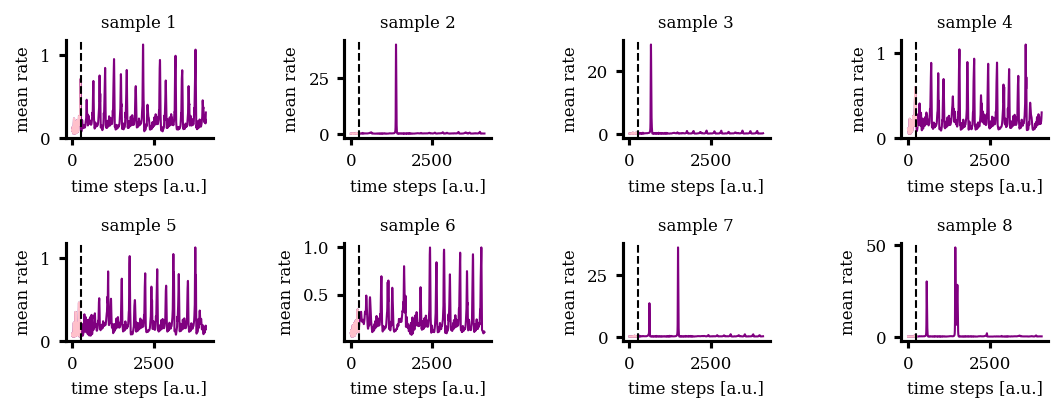

In [4]:
fig, axes = plt.subplots(2, 4, figsize=cm2inch(20, 8))
fig.tight_layout(pad=4.0)
rates = data_dict["sampled_rates"]
for tr in range(8):
    ax = axes[tr // 4, tr % 4]
    # plot in purple, first 256 steps pink
    ax.plot(np.mean(rates[tr, :, :], axis=-1), color='purple', label=f'trial {tr}')
    ax.plot(np.mean(rates[tr, :256, :], axis=-1), color='pink')
    ax.set_xlabel('time steps [a.u.]')
    ax.axvline(256, color='k', linestyle='--')
    ax.set_title(f'sample {tr+1}')
    ax.set_ylabel('mean rate')
